Un commentaire

In [58]:
import pandas as pd

In [59]:
data=pd.read_csv("/content/bank.csv") 

In [60]:
from google.colab import files
uploaded = files.upload()

In [61]:
pwd

'/content'

In [62]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [63]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#from keras.utils import to_categorical
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [64]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [65]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [66]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [67]:

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [68]:
data = MultiColumnLabelEncoder(columns = ['job','marital','education', 'default','housing','loan','contact','month','poutcome','deposit']).fit_transform(data)

In [69]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [70]:
df=data
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [71]:
# features
X = df.drop('deposit', axis=1)
print(X)
#X

# target
y=data['deposit']
print(y)

       age  job  marital  education  ...  campaign  pdays  previous  poutcome
0       59    0        1          1  ...         1     -1         0         3
1       56    0        1          1  ...         1     -1         0         3
2       41    9        1          1  ...         1     -1         0         3
3       55    7        1          1  ...         1     -1         0         3
4       54    0        1          2  ...         2     -1         0         3
...    ...  ...      ...        ...  ...       ...    ...       ...       ...
11157   33    1        2          0  ...         1     -1         0         3
11158   39    7        1          1  ...         4     -1         0         3
11159   32    9        2          1  ...         2     -1         0         3
11160   43    9        1          1  ...         2    172         5         0
11161   34    9        1          1  ...         1     -1         0         3

[11162 rows x 16 columns]
0        1
1        1
2        1
3   

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [73]:
print("len(X_train)=",len(X_train))
print("len(y_train)=",len(y_train))
#X_train.info()
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))


len(X_train)= 7813
len(y_train)= 7813
(7813, 16)
(7813,)
(3349, 16)
(3349,)


Un model séquentiel avec une seule couche cachée et un dropout de 0.5

In [74]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(16,)),
  Dropout(0.5),
  Dense(1, activation='sigmoid')])

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1088      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"]) # Configure the model for training

In [77]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test) ,epochs= 150) #training

Epoch 1/150
245/245 [==============================] - 1s 3ms/step - loss: 73.7104 - accuracy: 0.5615 - val_loss: 8.3874 - val_accuracy: 0.6832
Epoch 2/150
245/245 [==============================] - 0s 2ms/step - loss: 30.0982 - accuracy: 0.6327 - val_loss: 4.3033 - val_accuracy: 0.7369
Epoch 3/150
245/245 [==============================] - 0s 2ms/step - loss: 11.5492 - accuracy: 0.6635 - val_loss: 3.1058 - val_accuracy: 0.7456
Epoch 4/150
245/245 [==============================] - 0s 2ms/step - loss: 4.0988 - accuracy: 0.6848 - val_loss: 1.4063 - val_accuracy: 0.7160
Epoch 5/150
245/245 [==============================] - 1s 2ms/step - loss: 1.2373 - accuracy: 0.6673 - val_loss: 0.7689 - val_accuracy: 0.6775
Epoch 6/150
245/245 [==============================] - 0s 2ms/step - loss: 0.8051 - accuracy: 0.6773 - val_loss: 0.5666 - val_accuracy: 0.7128
Epoch 7/150
245/245 [==============================] - 1s 2ms/step - loss: 0.7032 - accuracy: 0.6894 - val_loss: 0.5827 - val_accuracy: 0.7

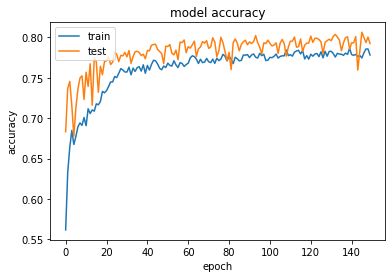

In [78]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Introduction  du Early Stopping


In [79]:
from keras.callbacks import EarlyStopping
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

In [80]:
history = model.fit(
  X_train, #inputs
  y_train, #target vector
  epochs=150, # number of epochs
  batch_size=32,
  callbacks = mycallbacks, # early stopping
  validation_data=(X_test, y_test))

Epoch 1/150
245/245 [==============================] - 1s 2ms/step - loss: 0.4765 - accuracy: 0.7816 - val_loss: 0.4594 - val_accuracy: 0.7955
Epoch 2/150
245/245 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7910 - val_loss: 0.4694 - val_accuracy: 0.7793
Epoch 3/150
245/245 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7792 - val_loss: 0.4820 - val_accuracy: 0.7814
Epoch 4/150
245/245 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.7788 - val_loss: 0.4496 - val_accuracy: 0.7984
Epoch 5/150
245/245 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7868 - val_loss: 0.4593 - val_accuracy: 0.8014
Epoch 6/150
245/245 [==============================] - 1s 2ms/step - loss: 0.4861 - accuracy: 0.7752 - val_loss: 0.4661 - val_accuracy: 0.7877
Epoch 7/150
245/245 [==============================] - 1s 2ms/step - loss: 0.4814 - accuracy: 0.7800 - val_loss: 0.4545 - val_accuracy: 0.7967

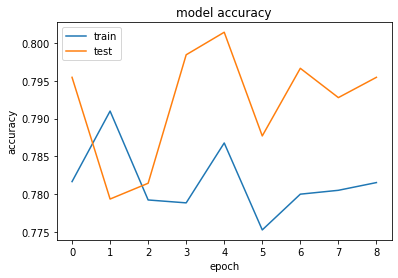

In [81]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

On remarque que l'accuracy sur le X_test est légèrement meilleure que celle obtenue sur le X_train !